<a href="https://colab.research.google.com/github/Haneen-Alahmadi/Computer-Vision/blob/main/computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from PIL import Image, ImageFilter

In [ ]:
def compare_image(image1, image2):
  plt.figure(figsize=(9,9))
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.title('Orignal')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.title('Modified')
  plt.axis('off')

  plt.tight_layout()

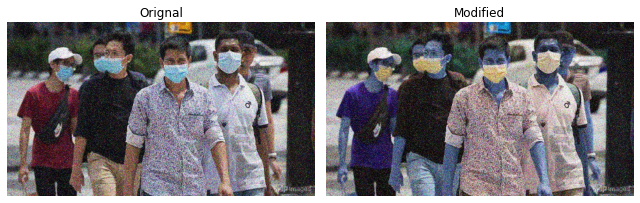

In [ ]:
img = cv2.imread('noisyimage.png')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
compare_image(img2,img)

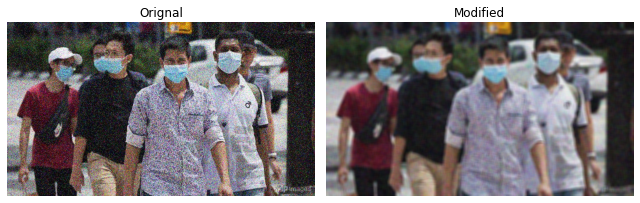

In [ ]:
kernel = np.ones((10,10),np.float32)/100
cnv = cv2.filter2D(img2, -1, kernel)
compare_image(img2,cnv)

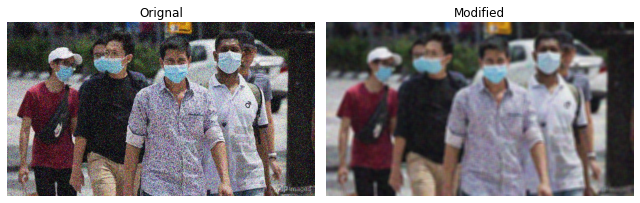

In [ ]:
## Average Filtering
blur = cv2.blur(img2,(10,10))
compare_image(img2,blur)

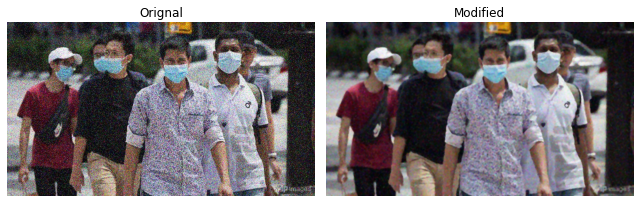

In [ ]:
## median filter
median = cv2.medianBlur(img2,5)
compare_image(img2,median)

In [ ]:
%%capture
%matplotlib inline
!pip install kornia

In [ ]:
import kornia
kornia.__version__

'0.6.8'

In [ ]:
%%capture
!wget noisyimage.png

In [ ]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

# read the image with OpenCV
img: np.ndarray = cv2.imread('noisyimage.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)  # BxCxHxW

In [ ]:
# create the operator
gauss = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))

# blur the image
x_blur: torch.tensor = gauss(data.float())

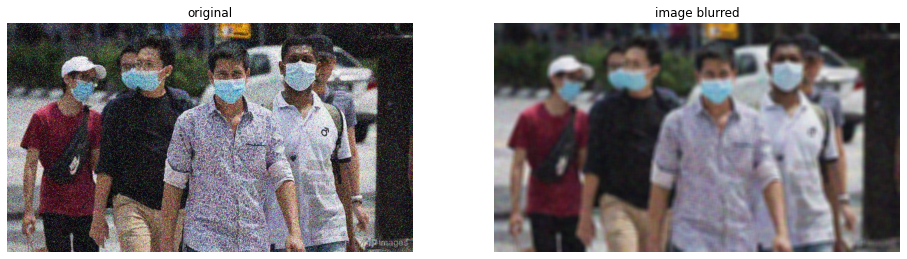

In [ ]:
# convert back to numpy
img_blur: np.ndarray = kornia.tensor_to_image(x_blur.byte())

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('original')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('image blurred')
axs[1].imshow(img_blur)

pass

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

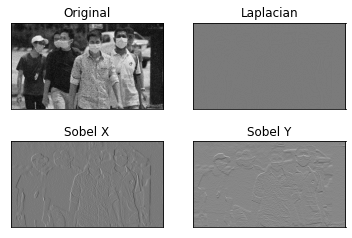

In [ ]:
# read image
img = cv2.imread("noisyimage.png", 0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
# find vertical edge
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# find horizontal edge
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
from math import log10, sqrt


In [ ]:
def PSNR(img2, new_image):
    mse = np.mean((img2 - new_image) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(img2, new_image)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()


PSNR value is 28.269011002474684 dB


In [ ]:
def mse(img2, new_image):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((img2.astype("float") - new_image.astype("float")) ** 2)
	err /= float(img2.shape[0] * img2.shape[1])
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
	def main():
     value = mse(img2, new_image)
     print(f"MSE value is {value} dB")
       
if __name__ == "__main__":
    main()
  

MSE value is 3738.8100581814438 dB
